# Faculty Notebook - Day 04

------------------------------------------

## Given data :

* **The data set contains information about money spent on advertisement and their generated sales. Money was spent on TV, radio and newspaper ads.**

**Note:** The objective is to use linear regression to understand how advertisement spending impacts sales.

| Sl No | Variable | Description |
| ---- | ---------------- | ------------------------------------- |
| 1 | TV | float | 
| 2 | radio | float | 
| 3 | newspaper | float |  
| 4 | sales | float  |  

----------------

### Step 1: Import Libraries

In [45]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm
%matplotlib inline
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt   
from sklearn import metrics

In [6]:
import os
os.chdir('C:\\Users\\DILIP\\Downloads\\S-SLR\\Day3\\Faculty-NoteBook-Day3\\Faculty-Notebook-Part1')

### Step 2: Import the Dataset

In [7]:
data = pd.read_csv('Advertising.csv', index_col=0)
data.head() 

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Step3: Check the dimensions of data

In [8]:
data.shape

(200, 4)

### Step4: Check whether data has numerical or categorical data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


### Step5: visualize the relationship between the features and the response using scatterplots

C:\Users\DILIP\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


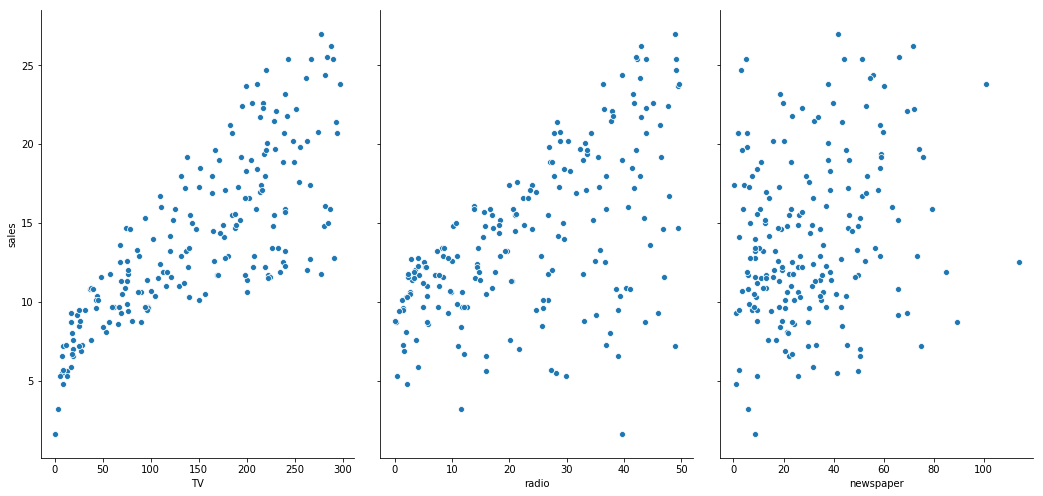

In [10]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', size=7, aspect=0.7)

### Step6: Plot each independent variable using the regression line

C:\Users\DILIP\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


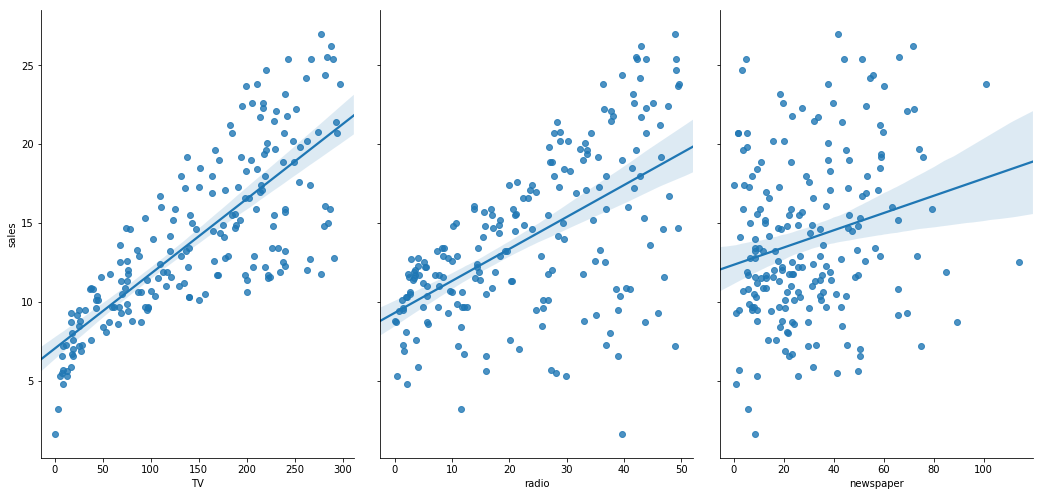

In [11]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')

### Let's estimate the model coefficients for the advertising data

### Step7: Create a fitted model

In [12]:
lm1 = smf.ols(formula='sales ~ TV', data=data).fit()

# print the coefficients
lm1.params

Intercept    7.032594
TV           0.047537
dtype: float64

**NOTE:** Here we don't need to add the add_constant 

### Step8: Another way to fit the model

### Step8.1: Create response

In [13]:
y = data.sales 


### Step8.2: create predictor

In [14]:
X = data.TV 

### Step8.3 : Adds a constant term to the predictor

In [15]:
X = sm.add_constant(X)  
X.head()

C:\Users\DILIP\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,TV
1,1.0,230.1
2,1.0,44.5
3,1.0,17.2
4,1.0,151.5
5,1.0,180.8


### OBSERVATION:

* Now we perform the regression of the predictor on the response, using the ``sm.OLS`` class and and its initialization ``OLS(y, X)`` method. This method takes as an input two array-like objects: ``X`` and ``y``. 
* In general, ``X`` will either be a numpy array or a pandas data frame with shape ``(n, p)`` where ``n`` is the number of data points and ``p`` is the number of predictors. 
* ``y`` is either a one-dimensional numpy array or a pandas series of length ``n``.

### Step9 : Fitting Simple Linear Regression IN Stats

In [16]:
est = sm.OLS(y, X)

#### OBSERVATION:
* We then need to fit the model by calling the OLS object's ``fit()`` method. Ignore the warning about the kurtosis test if it appears

In [17]:
est = est.fit()
est.params

const    7.032594
TV       0.047537
dtype: float64

### Step10: Check stats summary()

In [28]:
# import formula api as alias smf
import statsmodels.formula.api as smf

# formula: response ~ predictors
est = smf.ols(formula='sales ~ TV', data=data).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 31 Jul 2019   Prob (F-statistic):           1.47e-42
Time:                        15:02:57   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##  Simple Linear Regression Modelling in Machine learning

### Step1: Read the data

In [29]:
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Step2: Check the relation between dependent and independent variables

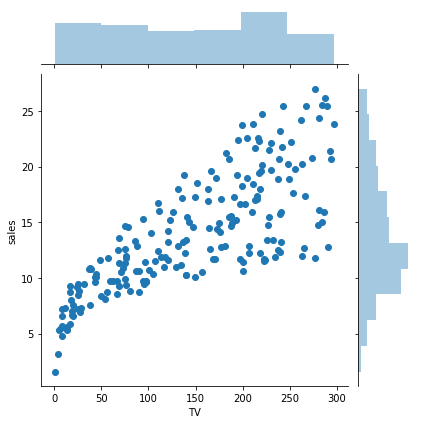

In [30]:
sns.jointplot(data.TV,data.sales)

### Step3: Plot all variables check the relation

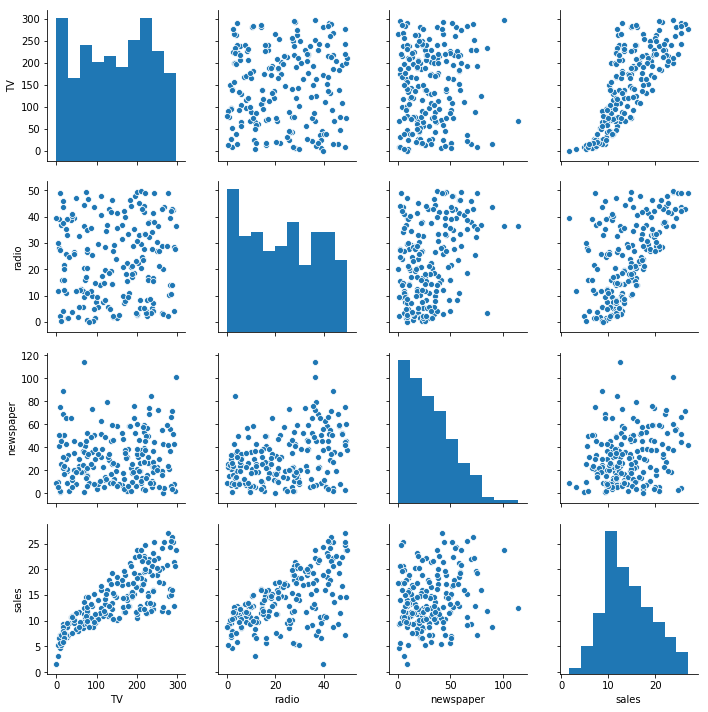

In [31]:
sns.pairplot(data)

### Step4: plot the heatmap

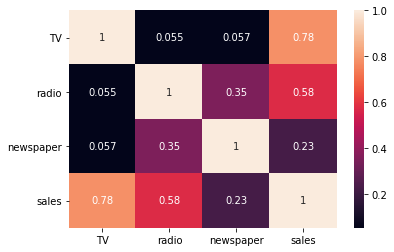

In [32]:
sns.heatmap(data.corr(),annot=True)


### Observation:

1.The diagonal of the above matrix shows the auto_correlation of the variance .Its is always 1. We can observe that 
the correlation between sles vs tv  is highest i.e 0.78.

2.Correlaton can be vary from -1 and +1 .Closer to +1 means strong positive correlation and close -1 means
strong negative correlation . Closer to 0 means not very strong correlation . Variables with strong 
correlations are mostly probabily candidtes for the model bulding.    

### Step 5: Classifying the dependent and Independent Variables

In [33]:
feature_cols = ['TV']

In [34]:
x = data[feature_cols]
y = data.sales

### Step 6:  Splitting the dataset into the Training set and Test set.

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

### Step7: Fitting Simple Linear Regression to the Training set.

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Step8:  Intercept value 

In [39]:
regressor.intercept_ 

7.2172161229788605

### Step9: coefficients value Beta

In [40]:
regressor.coef_ 

array([0.04689391])

In [41]:
predictivebalance = regressor.predict(X_train)


### Step 10: R^2 and MSE and RMSE

$R^2$ term is the coefficient of determination and it reflects how well the model fits the observed data.

The coefficient of determination is given by $R^2$ = 1 - $\frac{SSE}{SST}$

* Let y be the observed response.
* $\hat{y}$ be the predicted value for the response
* $\overline{y}$ be the mean of the response

SSE = $\sum_{i=1}^{n}{(y_i - \hat{y}_i)}^2$

SST = $\sum_{i=1}^{n}{(y_i - \overline{y}_i)}^2$

### R^2

* Issure with R-squared

* R-squared will always increase as you add more features to the model, even if they are unrelated to the response
Selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

In [42]:
print("R^2:",regressor.score(X_train, y_train))

R^2: 0.575301430004961


### MAE

In [46]:
MAE = metrics.mean_absolute_error(predictivebalance,y_train)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 2.7385287610449494


### MSE

In [49]:
mse = metrics.mean_squared_error(predictivebalance,y_train)
print("Mean Squared Error:",mse)

Mean Squared Error: 11.590065030880293


### RMSE

In [50]:
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_train, predictivebalance)))

RMSE: 3.4044184570760825


### Step7: Visualising the Training set results

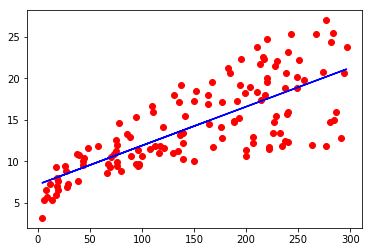

In [51]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')

### Step8: Visualising the Test set results

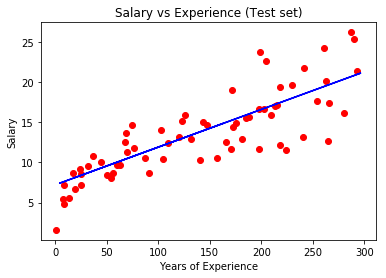

In [52]:

plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Step9: Predicting the Test set results

In [53]:
y_pred = regressor.predict(X_test)
model1=sm.OLS(y_train,X_train)
result = model1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     1138.
Date:                Wed, 31 Jul 2019   Prob (F-statistic):           9.26e-67
Time:                        15:50:33   Log-Likelihood:                -400.18
No. Observations:                 133   AIC:                             802.4
Df Residuals:                     132   BIC:                             805.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0833      0.002     33.737      0.000       0.078       0.088
==============================================================================
Omnibus:                       16.229   Durbin-Watson:                   1.537
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.864
Skew:                          -0.919   Prob(JB):                     8.01e-05
Kurtosis:                       3.161   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Importing the necessary packages for the analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

%matplotlib inline


## Read The Data

Now that you have imported your packages, let's read the data that we are going to be using. 

**Note:** The dataset provided is a titled **housing_data.csv** and contains housing prices and information about the features of the houses. Below, read the data into a variable and visualize the top 8 rows of the data.  

In [2]:
data1 = pd.read_csv('housing_Test.csv')
data = pd.read_csv('housing_Train.csv')
data.head(8)


,lot_area,firstfloor_sqft,living_area,bath,garage_area,price
0,35760,1831,3627,3,807,625000
1,22950,1518,3608,2,840,475000
2,18386,1675,3493,3,870,295000
3,14100,1968,3447,3,1014,381000
4,10896,1440,3395,2,0,200000
5,53504,1690,3279,3,841,538000
6,14720,2053,3238,2,666,410000
7,12692,3228,3228,3,546,430000


### Split data into train and test

In the code below, we need to split the data into the train and test for modeling and validation of our models. We will cover the Train/Validation/Test as we go along in the project. Fill the following code.

1\. Subset the features to the variable: features <br>
2\. Subset the target variable: target <br>
3\. Set the test size in proportion in to a variable: test_size <br>


In [3]:
features = data[['lot_area', 'firstfloor_sqft', 'living_area', 'bath', 'garage_area', 'price']]
target = data['price']
test_size = .33


x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=42)

### Data Visualization

**NOTE:** The best way to explore the data we have is to build some plots that can help us determine the relationship of the data. We can use a scatter matrix to explore all our variables. Below is some starter code to build the scatter matrix  

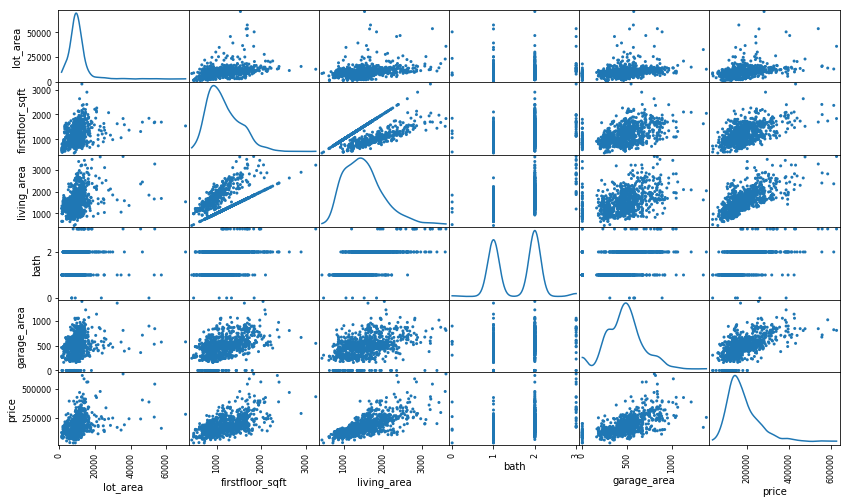

In [4]:
features = pd.plotting.scatter_matrix(x_train, figsize=(14,8), alpha=1, diagonal='kde')

## Write a brief description of what you observe in scatter matrix above:

* Think about the relationship and whether linear regression is an appropriate choice for modelling this data.

### A. lot_area:


---------
1. Our initial intutions tell us that lot_area would be the best indicator of price; that being said, there is a weak correlation between lot_area and the other features, which is a good sign! However, the distribution is dramatically skewed-right indicating that the mean lot_area is greater than the median. 

2. This tells us that lot_area stays around the same size while price increases.

3. In turn, that tells us that some other feature is helping determine the price bceause if lot_area we're determining the increase in price, we'd see a linear distribution. In determining the best feature for my linear regression model, So we think lot_area may be one of the least fitting to use.

### B. firstfloor_sqft:


1. There is a stronger correlation between firstfloor_sqft and the other features. The distrubution is still skewed-right making the median a better measure of center. 

2. firstfloor_sqft would be a good candidate for the linear regression model becuse of the stronger correlation and wider distribution; however, there appears to be a overly strong, linear correlation between firstfloor_sqft and living_area.


### C. living_area:

------------
1. There is a similarly strong correlation between living_area (as compared to firstfloor_sqft) and the other features, but these plots are better distributed than firstfloor_sqft. 

2. A right skew still exists, but less so than the firstfloor_sqft. However, the observation of a strong, linear correlation between firstfloor_sqft and living_area (or living_area and firstfloor_sqft) is reinforced here. 

3. Thus, we would not use both of these in my final model and having to choose between the two, we will likely choose living_area since it appears to be more well-distributed. 

### D. bath:

----------
1. Baths are static numbers, so the plots are much less distributed; however, the length and the clustering of the bath to living_area & bath to garage_area may indicate a correlation. Since we cannot use both living_area and firstfloor_sqft, and we think living_area has a better distribution, I would consider using bath in conjunction with living_area. 

### E. garage_area:

------
1. Garage_area appears to be well-distributed with the lowest correlation between the other features. This could make it a great fit for the final regression model. It's also the least skewed right distribution. 

## Correlation Matrix:

**NOTE:** In the code below, compute the correlation matrix and We are writting a few thoughts about the observations. In doing so, consider the interplay in the features and how their correlation may affect your modeling.
 

In [5]:
# Use pandas correlation function
x_train.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)


,lot_area,firstfloor_sqft,living_area,bath,garage_area,price
lot_area,1.0,0.36,0.36,0.16,0.28,0.39
firstfloor_sqft,0.36,1.0,0.53,0.39,0.47,0.61
living_area,0.36,0.53,1.0,0.63,0.44,0.72
bath,0.16,0.39,0.63,1.0,0.4,0.56
garage_area,0.28,0.47,0.44,0.4,1.0,0.63
price,0.39,0.61,0.72,0.56,0.63,1.0


## We are writting a few thoughts about the observations:

1. The correlation matrix above is in-line with our thought process. Lot_area has the lowest correlation between it and the other features, but it's not well distributed. 
------------
2. firstfloor_sqft has a strong correlation between it and living_area. Given that the correlation is just over 0.5, both features may be able to be used in the model given that the correlation isn't overly strong; however, to be most accurate, We plan to leave out one of them (likely firstfloor_sqft). 



3. living_area also reflects this strong correlation between it and firstfloor_sqft. Surprisingly, there is a strong correlation between living_area and bath. 
--------------
4. Looking solely at the scatter matrix, we did not see this strong correlation. This changes my approach slighltly, which we will outline above. garage_area, again, has the lowest correlations while being the most well-distributed.

### Approach: 

Given this new correlation information, We will approach the regression model in one of the following ways:

        1. Leave out bath as a feature and use living_area + garage_area.
        2. Swap firstfloor_sqft for living_area and include bath + garage area.

### Conclusion
We are not 100% sure if more features are better than less in this situation; however, We are sure that We want linearly independet features. 

## 1. Build Your Model

Now that we have explored the data at a high level, let's build our model. In this section you will create your own estimators. Starter code is provided to makes this easier.


$$\beta_0 = \bar {y} - \beta_1 \bar{x}$$ <br>
$$\beta_1 = \frac {cov(x, y)} {var(x)}$$ <br>

Below, let's define functions that will compute these parameters

In [6]:
# Pass the necessary arguments in the function to calculate the coefficients

def compute_estimators(feature, target):
    n1 = np.sum(feature*target) - np.mean(target)*np.sum(feature)
    d1 = np.sum(feature*feature) - np.mean(feature)*np.sum(feature)
    
    # Compute the Intercept and Slope
    beta1 = n1/d1
    beta0 = np.mean(target) - beta1*np.mean(feature)
    
    return beta0, beta1 # Return the Intercept and Slope


Run the compute estimators function above and display the estimated coefficients for any of the predictors/input variables.

In [7]:
# Remember to pass the correct arguments
beta0, beta1 = compute_estimators(data1['living_area'], data1['price'])
print(beta0, beta1)

18569.02585648722 107.13035896582521


In [8]:
#### Computing coefficients for our model by hand using the actual mathematical equations
y = beta1 + beta0
print(y)

18676.156215453044


## 1.2. sklearn solution

**NOTE:** Now that we know how to compute the estimators, let's leverage the sklearn module to compute the metrics for us. We have already imported the linear model, let's initialize the model and compute the coefficients for the model with the input above.

In [9]:
# Initilize the linear Regression model here
model = linear_model.LinearRegression()

# Pass in the correct inputs
model.fit(data1[['living_area']], data1['price'])

# Print the coefficients
print("This is beta0:", model.intercept_)
print("This is beta1:", model.coef_) 
#### Computing coefficients for our model using the sklearn package 


This is beta0: 18569.02585648728
This is beta1: [107.13035897]


* Do the results from the cell above and your implementation match? They should be very close to each other. But they match!

### 2. Model Evaluation

**NOTE:** Now that we have estimated our single model. We are going to compute the coefficients for all the inputs. We can use a for loop for multiple model estimation. However, we need to create a few functions:

1\. Prediction function: Functions to compute the predictions <br>
2\. MSE: Function to compute Mean Square Error <br>

#### Function that computes predictions of our model using the betas above + the feature data we've been using 

In [10]:
def model_predictions(intercept, slope, feature):
    """ Compute Model Predictions """
    y_function = intercept+(slope*feature)
    
    return y_function

y_function = model_predictions(beta0, beta1, data1['living_area'])

#### Function to compute MSE which determines the total loss for each predicted data point in our model

In [11]:
def mean_square_error(y_outcome, predictions):
    """ Compute the mean square error """
    mse = (np.sum((y_outcome - predictions) ** 2))/np.size(predictions)
    
    return mse

mse = mean_square_error(target, y_function)
print(mse)

8957196059.803959


#### The last function we need is a plotting function to visualize our predictions relative to our data.


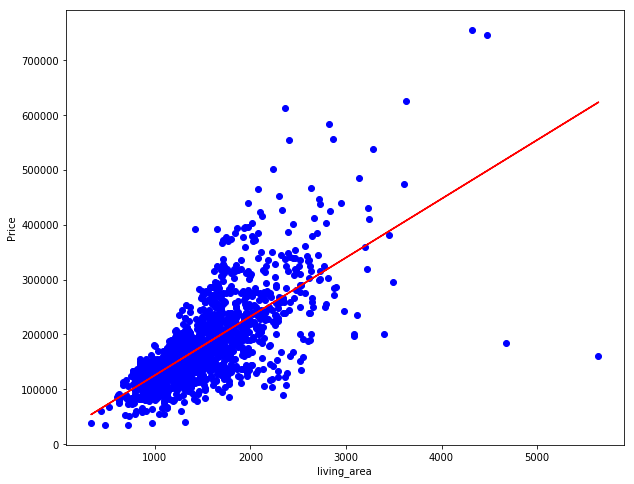

In [12]:
#Function used to plot the data: 

def plotting_model(feature, target, predictions, name):
    """ Create a scatter and predictions  """
    fig = plt.figure(figsize=(10,8)) 
    plot_model = model.fit(feature, target)
    plt.scatter(x=feature, y=target, color='blue')
    plt.plot(feature, predictions, color='red')
    plt.xlabel(name)
    plt.ylabel('Price')

    return model

model = plotting_model(data1[['living_area']], data1['price'], y_function, data1['living_area'].name)


### Data Integrity:

-----------
1. After our inital linear model based on the feature "living area,
-----------
2. If we look at the graph above, there are 4 outliers that are clear, and at least 4 others that follow a similar trend based on the x, y relationship. 


3. We used ~3500 sqft of living area as my cutoff for being not predictive of the model, and any price above 600000. Given the way these data points skew the above model, they intuitively appear to be outliers with high leverage.

-------------
4. We determined this by comparing these high leverag points with points similar to it in someway and determined whether it was an outlier (i.e. if point A's price was abnormally high, I found a point (B) with living area at or close to point A's living area and compared the price. vice versa if living area was abnormally high).

### Inital Feature Analysis - "Best" Feature (a priori):
-------------
1. Living area is the best metric to use to train the linear model because it incorporates multiple of the other features within it: first floor living space & bath. 

------------
2. Living area has a high correlation with both first floor sq ft (0.53) and baths (0.63). Based on the other correlations, these are the two highest, and thus should immediately be eliminated. 

---------
3. Additionally, based on initial intuition, one would assume that an increase in the metric "firstfloor sqft" will lead to an increase in the "living area" metric; if both firstfloor sqft and overall living area are increased, the "bath" metric will likely also increase to accommodate the additional living area/sqft in a home.

### Finding Each Single Feature through to determine which has best linear fit

living_area
beta0: 12908.1284411604
beta1: 110.89225146416194
mean squared error: 2815789647.7664313

garage_area
beta0: 71321.26360425558
beta1: 230.2030162829738
mean squared error: 3466639234.8407283

lot_area
beta0: 127368.85540055121
beta1: 5.232206926890248
mean squared error: 5049292305.478467

firstfloor_sqft
beta0: 30417.01964454449
beta1: 129.30518669452894
mean squared error: 3582314928.964111

bath
beta0: 58167.54993139299
beta1: 77960.26632816301
mean squared error: 4026327007.394888



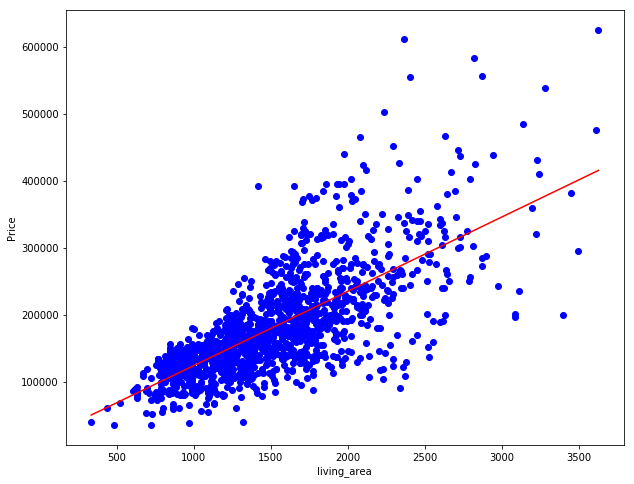

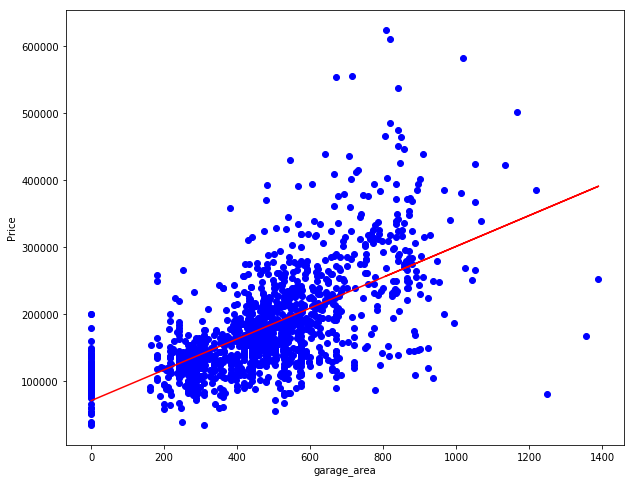

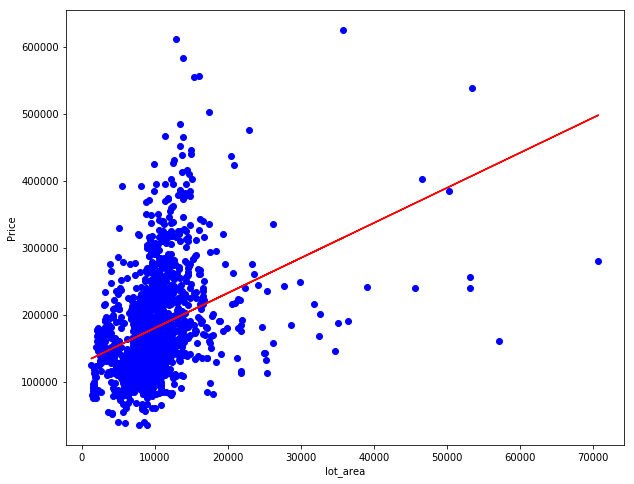

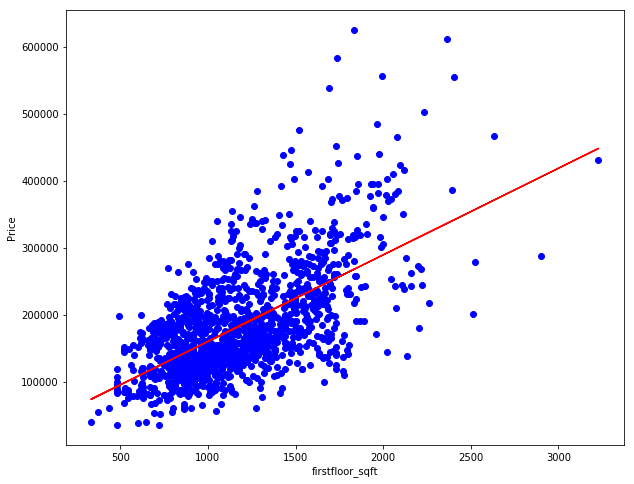

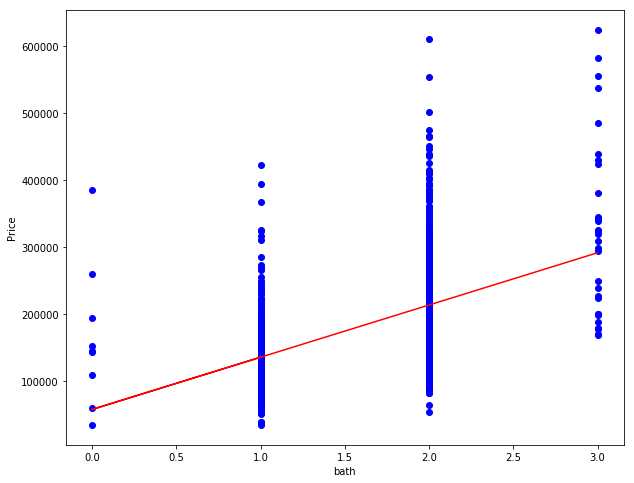

In [13]:
features = data[['living_area', 'garage_area', 'lot_area', 'firstfloor_sqft', 'bath']]
count = 0

for feature in features:
    feature = features.iloc[:, count]
    # Compute the Coefficients
    beta0, beta1 = compute_estimators(feature, target)
    count+=1
    
    # Print the Intercept and Slope
    print(feature.name)
    print('beta0:', beta0)
    print('beta1:', beta1)

    # Compute the Train and Test Predictions
    y_hat = model_predictions(beta0, beta1, feature)

    # Plot the Model Scatter  
    name = feature.name
    model = plotting_model(feature.values.reshape(-1, 1), target, y_hat, name)
    
    # Compute the MSE
    mse = mean_square_error(target, y_hat)
    print('mean squared error:', mse)
    print()
    

### Analysis of Feature Linear Models:
------------
1. MSE for Living Area drop significantly from 8957196059.803959 to 2815789647.7664313. In fact, Living Area has the lowest MSE 2815789647.7664313 of all the individual models, and the best linear fit.

---------------
2. Garage Area is the next lowest MSE 3466639234.8407283, and the model is mostly linear; however, the bottom left of the model is concerning. 

----------
3. We'll notice that a large number of data points go vertically upward indicating an increase in price with 0 garage area. That says to us that garage area isn't predicting the price of these homes, which indicates that it may be a good feature to use in conjunction with another feature (i.e. Living Area) or since those data points do not fit in with the rest of the population, they may need to be removed.

## Run Model 

**NOTE:** Now that we have our functions ready, we can build individual models, compute preductions, plot our model results and determine our MSE. **Notice that we compute our MSE on the test set and not the train set.**



### Dot Product (multiple feature) Assessment

#### Models Living Area alone and compares it to the Dot Product of Living Area with each other feature

#### Determining if a MLR would be a better way to visualize the data

living_area
beta0: 12908.1284411604
beta1: 110.89225146416194
mean squared error: 2815789647.7664313

garage_area * living_area
beta0: 88675.9456927962
beta1: 0.12034374773425742
mean squared error: 2064321922.99655

lot_area * living_area
beta0: 123251.8606427904
beta1: 0.0035276987010394866
mean squared error: 3802170878.8921647

firstfloor_sqft * living_area
beta0: 81727.47465317308
beta1: 0.053467447469143566
mean squared error: 2456865745.3672667

bath * living_area
beta0: 91196.33728151293
beta1: 35.14797065578143
mean squared error: 2904899481.7202654



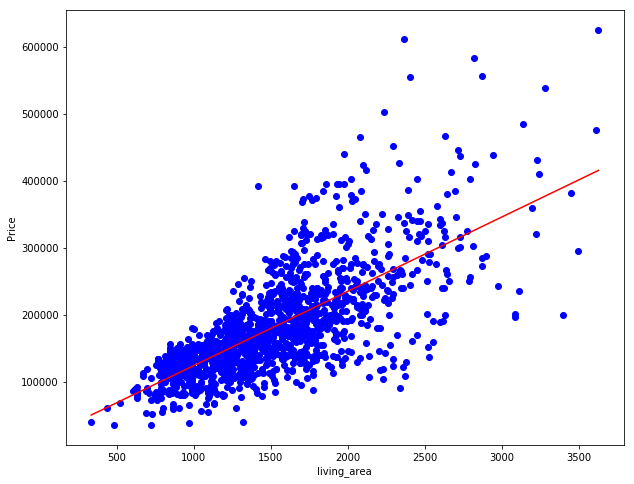

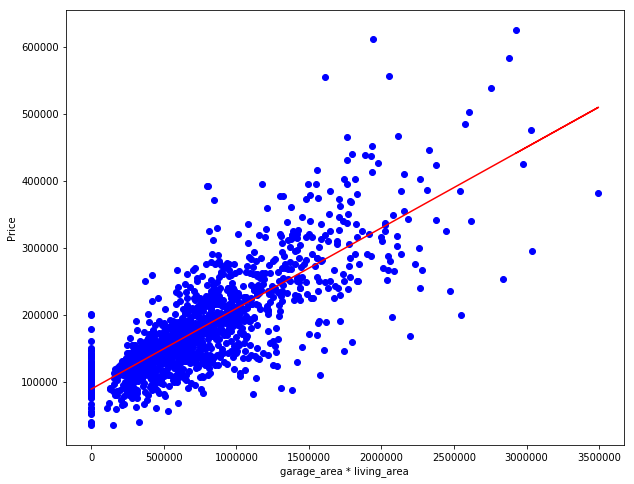

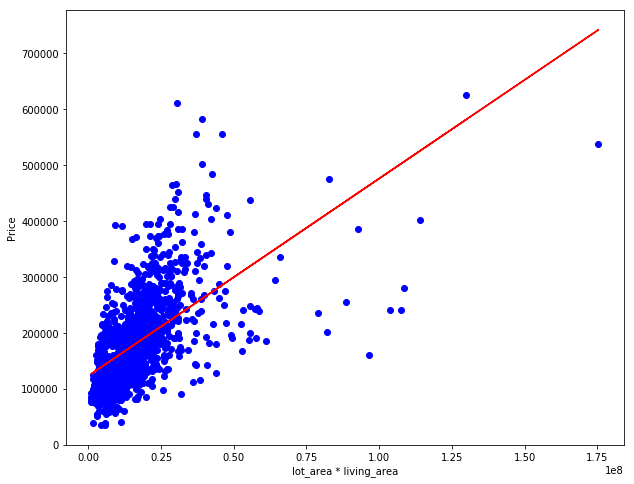

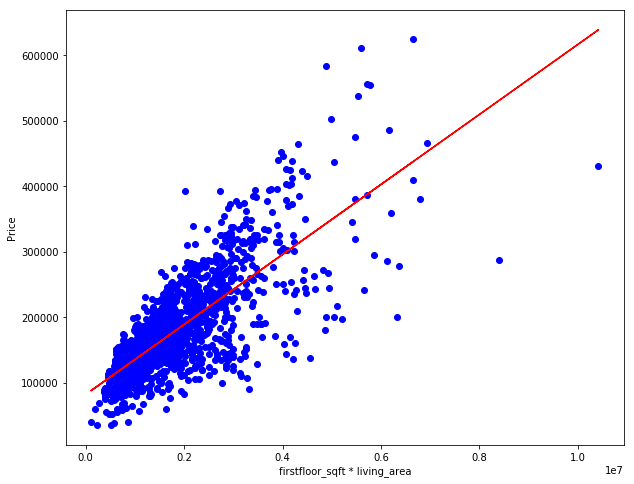

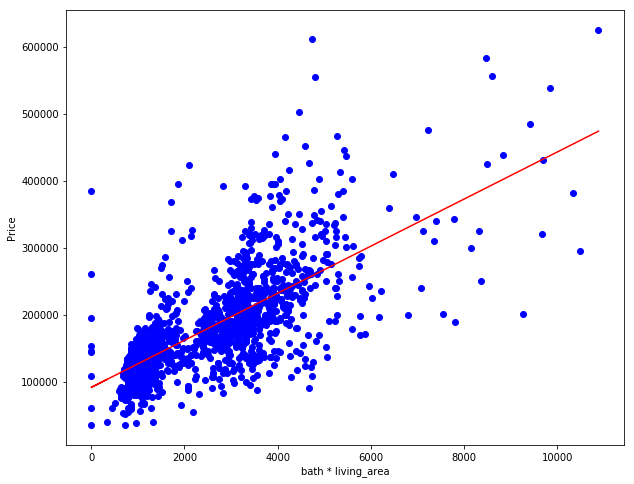

In [14]:
features = data[['living_area', 'garage_area', 'lot_area', 'firstfloor_sqft', 'bath']]
count = 0

for feature in features:
    feature = features.iloc[:, count]
    #print(feature.head(0))
    if feature.name == 'living_area':
        x = data['living_area']
    else:
        x = feature * data['living_area']
    # Compute the Coefficients
    beta0, beta1 = compute_estimators(x, target)
    
    # Print the Intercept and Slope
    if feature.name == 'living_area':
        print('living_area')
        print('beta0:', beta0)
        print('beta1:', beta1)
    else: 
        print(feature.name, "* living_area") 
        print('beta0:', beta0)
        print('beta1:', beta1)

    # Compute the Train and Test Predictions
    y_hat = model_predictions(beta0, beta1, x)

    # Plot the Model Scatter  
    if feature.name == 'living_area':
        name = 'living_area'
    else:
        name = feature.name + " " + "* living_area" 
    model = plotting_model(x.values.reshape(-1, 1), target, y_hat, name)
    
    # Compute the MSE
    mse = mean_square_error(target, y_hat)
    print('mean squared error:', mse)
    print()
    count+=1
    

## Analysis:

Based on the models, it appears that two of the dot products provide a more accurate model:
    
    1. Living Area * First Floor SqFt
    2. Living Area * Garage Area 
    
These two dot products provide a lower MSE and thus lowers the loss per prediction point.

## 1. Living Area * First Floor SqFt:



* Our intuition says that since Living Area, as a feature, will include First Floor SqFt in its data. The FirstFloor SqFt can be captured by Living Area, so it can be left out. 

* Additionally, since one is included within the other, we cannot say anything in particular about Living Area or FirstFloor SqFt individually. 

* Also, the correlation (Ln 24 & Out 24) between Living Area and FirstFloor SqFt is 0.53, which is the highest apart from Bath. 

* This correlation is low in comparison to the "standard;" however, that standard is arbitrary. I've lowered it to be in context with data sets I'm working with in this notebook.



## 2.Living Area * Garage Area:

* The dot product of Living Area & Garage Area provides doesn't allow us to make a statement about each individually, unless we provide a model of each, which we will do below. 

* This dot product is a better model. Garage Area is advertised as 'bonus' space and CANNOT be included in the overall square footage of the home (i.e. living area). 

* Thus, garage area vector will not be included as an implication within the living area vector making them linearly independent. 

* Garage Area can be a sought after feature depending on a buyer's desired lifestlye; more garage space would be sought after by buyers with more cars, which allows us to draw a couple possible inferences about the buyers:

    1. enough net worth/monthly to make payments on multiple vehicles plus make payments on a house/garage
    2. enough disposable income to outright buy multiple vehicles plus make payments on a house/garage

**Additionally,** it stands to reason that garage area would scale with living area for pragmatic reasons (more living area implies more people and potentially more vehicles) and for aesthetic reasons (more living area makes home look larger and would need larger garage).

* Homes with more living area and garage area may be sought after by buyers with the ability to spend more on a home, and thus the market would bear a higher price for those homes, which helps explain why living area * garage area is a better indicator of home price.


## Conclusion:

Combining living area with other features lowered the MSE for each. The lowest MSE is living area * garage area, which **confirms my hypothesis:** Living Area is the best feature to predict price, and garage area is good when used in conjunction. 

#### Modeling Living Area & Garage Area separately.

living_area
beta0: 12908.1284411604
beta1: 110.89225146416194
mean squared error: 2815789647.7664313

garage_area
beta0: 71321.26360425558
beta1: 230.2030162829738
mean squared error: 3466639234.8407283



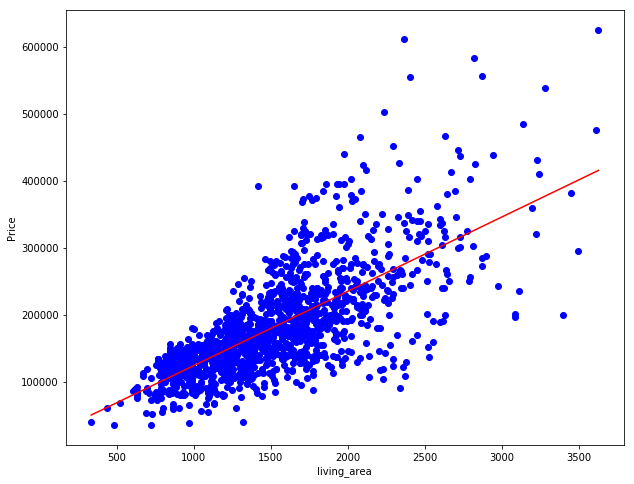

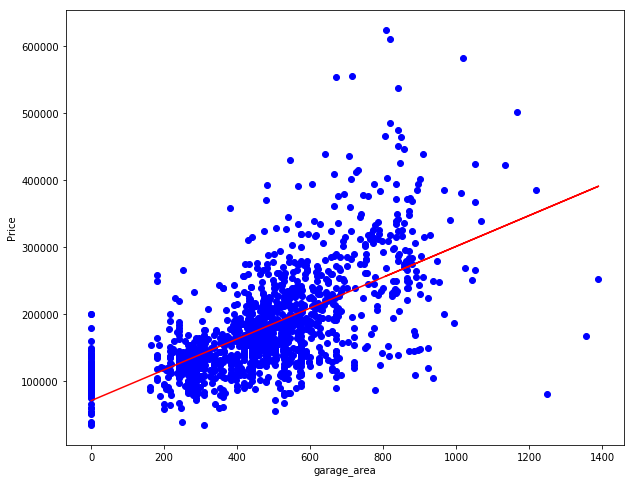

In [15]:
features = data[['living_area', 'garage_area']]
count = 0
for feature in features:
    feature = features.iloc[:, count]
    if feature.name == 'living_area':
        x = data['living_area']
    elif feature.name == 'garage_area':
        x = data['garage_area']
    
    beta0, beta1 = compute_estimators(x, target)
    count+=1
    
    if feature.name == 'living_area':
        print('living_area')
        print('beta0:', beta0)
        print('beta1:', beta1)
    elif feature.name == 'garage_area':
        print('garage_area')
        print('beta0:', beta0)
        print('beta1:', beta1)
    
    y_hat = model_predictions(beta0, beta1, x)
    
    if feature.name == 'living_area':
        name = 'living_area'
    elif feature.name == 'garage_area':
        name = 'garage_area'
    model = plotting_model(x.values.reshape(-1, 1), target, y_hat, name)
    
    mse = mean_square_error(target, y_hat)
    print('mean squared error:', mse)
    print()

### Modeling dot product of Living Area * Garage Area:

Name: garage_area * living_area
beta0: 88675.9456927962
beta1: 0.12034374773425742
mean squared error: 2064321922.99655



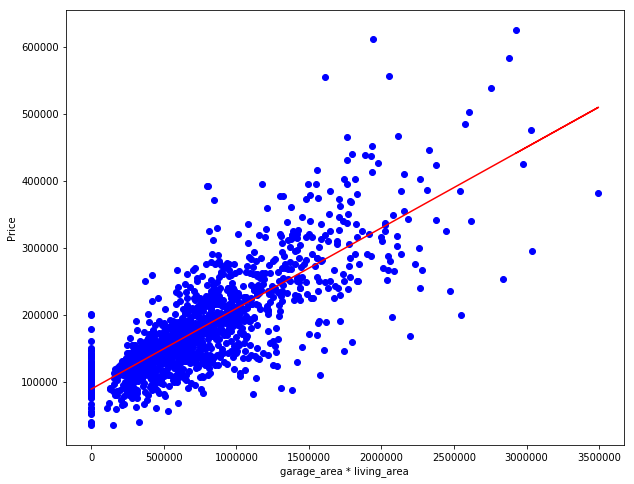

In [16]:
features = data[['living_area']]
x = features.iloc[:, 0]
x2 = x * data['garage_area']
#x3 = x2 * data['bath']

# Compute the Coefficients
beta0, beta1 = compute_estimators(x2, target)

# Print the Intercept and Slope
print('Name: garage_area * living_area')
print('beta0:', beta0)
print('beta1:', beta1)

# Compute the Train and Test Predictions
y_hat_1 = model_predictions(beta0, beta1, x2)

# Plot the Model Scatter  
name = 'garage_area * living_area'
model = plotting_model(x2.values.reshape(-1, 1), target, y_hat_1, name)

# Compute the MSE
mse = mean_square_error(target, y_hat_1)
print('mean squared error:', mse)
print()


## Reasoning:

* Above, We modeled both living area and garage area by themselves then the dot product of Living Area * Garage Area to highlight the MSE of each vs. 
* The MSE of the dot product. Garage Area, much more so than Living Area, has a high MSE indicating that on its own, Garage Area isn't the best predictor of a home's price; we must take the data in context with reality, and intuitively speaking, one wouldn't assume that the garage area, on its own, would be a feature indicative of price. 

* This fact combined with the assumption/implication that garage may scale with living area implies some correlation between the features, which would go against the linear assumption of feature independence. As a matter of fact, there is a correlation between them (Ln 24 & Out 24) of 0.44; however, this isn't problematic for two reasons:

    1. 0.44 is quite low in regard to typical correlation standards.
    2. Data must be seen in context. 
    

####  0.44 is quite low in regard to typical correlation standards:

* Although We eliminated First Floor SqFt due, in part, to a high correlation and that correclation is only 0.09 points lower. 
* The main reason why First Floor SqFt is eliminated is due to its inclusion within the living area vector. Additionally, the main reason why I'm including garage area is because it is not included with the living area vector.
--------------
####  Data must be seen in context:

* Similar to our #1 explanation, knowing that garage area is 'bonus space' and, as such, is NOT included in a home's advertised square feet indicates that it isn't within the Living Area data set in the same way FF SqFt or Baths would be.

* It will most likely to scale with the living area independently of the living area making it a good fit for a MLR.

### 3. Model Interpretation

**NOTE:** Now that you have calculated all the individual models in the dataset, provide an analytics rationale for which model has performed best. To provide some additional assessment metrics, let's create a function to compute the R-Squared.

#### Mathematically:

$$R^2 = \frac {SS_{Regression}}{SS_{Total}} = 1 - \frac {SS_{Error}}{SS_{Total}}$$<br>

where:<br>
$SS_{Regression} = \sum (\widehat {y_i} - \bar {y_i})^2$<br>
$SS_{Total} = \sum ({y_i} - \bar {y_i})^2$<br>
$SS_{Error} = \sum ({y_i} - \widehat {y_i})^2$




In [17]:
#ssr = sum of squares of regression --> variance of prediction from the mean
#sst = sum of squares total --> variance of the actuals from the prediction
#sse = sume of squares error --> variance of the atuals from the mean
def r_squared(y_outcome, predictions):
    """ Compute the R Squared """
    ssr = np.sum((predictions - np.mean(y_outcome))**2)
    sst = np.sum((y_outcome - np.mean(y_outcome))**2)
    sse = np.sum((y_outcome - predictions)**2)
    
#    print(sse, "/", sst)
    print("1 - SSE/SST =", round((1 - (sse/sst))*100), "%")
    
    rss = (ssr/sst) * 100
    
    return rss

**Note:** Now that you we have R Squared calculated, evaluate the R Squared for the test group across all models and determine what model explains the data best. 

In [18]:
rss = r_squared(target, y_hat_1)
print("R-Squared =", round(rss), "%")
count += 1

1 - SSE/SST = 65.0 %
R-Squared = 65.0 %


### R-Squared Adjusted

$R^2-adjusted = 1 - \frac {(1-R^2)(n-1)}{n-k-1}$

In [19]:
def r_squared_adjusted(rss, sample_size, regressors):
    n = np.size(sample_size)
    k = regressors
    numerator = (1-rss)*(n)
    denominator = n-k-1
    rssAdj = 1 - (numerator / denominator)
    
    return rssAdj

rssAdj = r_squared_adjusted(rss, y_hat_1, 2)

In [20]:
print(round(rssAdj), "%")

65.0 %


### 4. Model Diagnostics

Linear regressions depends on meetings assumption in the model. While we have not yet talked about the assumptions.